#### For this lab, you will be using the CSV files provided in the files_for_lab folder. These are cleaned versions of the learningSet data from the Case Study 'Healthcare for All'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import resample

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
categorical = pd.read_csv('categorical.csv')
numerical = pd.read_csv('numerical.csv')
target = pd.read_csv('target.csv')


In [3]:
all_data = pd.concat([numerical, categorical,target], axis=1)
all_data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [4]:
all_data.shape

(95412, 339)

In [5]:
#all_data = all_data.drop('TARGET_D', axis=1)
# unsure about at which point we delete tehe targetD

In [7]:
#checking for NaNs
nulls = [column for column in all_data if all_data[column].isna().sum() > 0]
nulls  

[]

In [8]:
all_data.isna().sum() == 0

TCODE           True
AGE             True
INCOME          True
WEALTH1         True
HIT             True
                ... 
LASTDATE_MM     True
FIRSTDATE_YR    True
FIRSTDATE_MM    True
TARGET_B        True
TARGET_D        True
Length: 339, dtype: bool

In [9]:
all_data['TARGET_B'].value_counts()


0    90569
1     4843
Name: TARGET_B, dtype: int64

In [10]:
# we can see that the target is quite imbalanced, we need to upscale it.

In [11]:
#features = features.drop('TARGET_D', axis=1)

In [12]:
#features_train = pd.concat([X_train, y_train], axis=1)
#features_train.head()

In [13]:
#features_train = features_train[~categoricalX.index.duplicated(keep='first')]

In [14]:

# Separate majority and minority classes
category_0 = all_data[all_data['TARGET_B']==0]
category_1 =  all_data[all_data['TARGET_B']==1]



In [15]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0),
                                  random_state=42)

In [16]:
print(category_0.shape)
print(category_1_oversampled.shape)

(90569, 339)
(90569, 339)


In [17]:
data_upscaled = pd.concat([category_0, category_1_oversampled])

In [18]:
data_upscaled.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [19]:
data_upscaled.isna().sum().sum()

0

In [20]:
data_upscaled['TARGET_B'].value_counts()

0    90569
1    90569
Name: TARGET_B, dtype: int64

In [21]:
X = data_upscaled.drop(['TARGET_B','TARGET_D'], axis = 1)
y = data_upscaled['TARGET_B']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
#categorical & numerical X-train
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(object)

#categorical & numerical X-test
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(object)


In [24]:
from sklearn.preprocessing import StandardScaler

#Scaling X-train
standardtransformer = StandardScaler().fit(X_train_num)
X_scaled_train = pd.DataFrame(standardtransformer.transform(X_train_num),columns=X_train_num.columns)

#Scaling X-test
X_scaled_test = pd.DataFrame(standardtransformer.transform(X_test_num),columns=X_test_num.columns)
X_scaled_test

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,-0.059669,-0.014486,-1.900486,-2.271833,2.089047,-0.210593,0.558834,-0.038706,0.621281,0.977348,-0.500603,0.719281,-2.036078,-0.207023,-0.195444,-0.262399,0.840459,-0.432924,-0.644681,0.319156,-0.170978,-0.079896,-0.370555,-0.230626,1.575391,0.116779,-0.328186,2.007874,0.584903,1.115770,1.497049,0.778208,-0.058397,0.174163,-0.241907,-0.102868,-0.160951,0.149169,0.227620,0.213183,-0.014352,-0.122053,-0.000297,-0.179943,-0.938340,0.571538,1.073965,0.161561,-0.518942,-0.271718,1.606145,1.471237,-0.606537,-0.701092,-0.823458,-1.157330,0.439231,1.169123,0.331156,-0.516941,-0.860696,-0.652222,-1.008267,-0.353205,1.071336,0.868827,1.210929,0.567233,0.279921,-0.362699,-0.497353,0.146931,1.012401,1.008531,1.071134,0.790461,-0.533312,-0.732271,-0.643676,-0.643004,-0.299317,-0.272195,-0.156150,1.784984,1.702716,2.408603,2.201647,0.884960,-0.879625,0.701203,-0.818483,-0.049607,0.356513,1.034568,0.934764,0.525161,0.724141,-0.776863,-0.329258,-0.558823,-0.236283,-0.933879,-0.637184,-0.704446,-0.269437,0.345905,-0.377674,-0.421642,-0.335636,-0.269483,2.492350,2.171248,1.643986,1.251079,0.817047,1.764031,-0.647189,1.575736,1.012472,1.164854,0.735891,0.552071,-0.635540,-0.546271,-0.591300,-0.140110,-0.564406,-0.619579,-0.531374,1.827571,1.374242,0.950935,0.614525,0.815899,-1.245970,1.139230,1.336674,1.234843,1.508076,1.362241,0.435352,-1.124434,-0.721647,-1.697253,0.352994,0.700342,2.062786,3.460672,1.025590,-0.005067,-1.031711,-0.622828,-1.602831,-0.077850,0.757328,1.809226,2.851763,0.779187,-0.074663,-0.565716,0.179987,0.614958,-0.560742,-0.728924,0.778542,-0.535898,0.738167,-0.578310,-0.430703,-0.403267,-0.211037,-0.128561,-0.350972,-0.376619,-0.354158,-0.361651,1.666910,0.675036,0.641488,-0.248311,0.572687,0.104400,0.345545,-0.147467,0.604690,-0.002029,-0.321669,-0.416987,-0.006297,0.816111,-0.382592,0.200910,0.451974,0.542052,-0.099801,0.968966,-0.399697,1.693277,-0.401833,-0.358911,-0.568076,-0.546242,-0.299503,-0.228806,-0.560635,-0.281718,-0.346860,0.109038,1.149341,0.568516,1.826862,-1.118092,0.221926,1.417366,-0.715269,0.615836,-0.444198,0.175557,-0.584316,0.112051,0.728136,-0.7

In [25]:
from sklearn.preprocessing import OneHotEncoder
#Create encoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

#encode train
encoded_train = encoder.transform(X_train_cat).toarray()
encoded_train = pd.DataFrame(encoded_train)

#encode test
encoded_test = encoder.transform(X_test_cat).toarray()
encoded_test = pd.DataFrame(encoded_test)

In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

encoded_categorical_train = encoder.transform(X_train_cat).toarray()
encoded_categorical_train = pd.DataFrame(encoded_categorical_train)

encoded_categorical_test = encoder.transform(X_test_cat).toarray()
encoded_categorical_test = pd.DataFrame(encoded_categorical_test)


In [27]:
scaled_training_data = pd.concat([encoded_categorical_train,X_scaled_train],axis=1)
scaled_test_data = pd.concat([encoded_categorical_test,X_scaled_test],axis=1)

In [28]:
data = pd.concat([scaled_training_data,scaled_test_data],axis=0)

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(scaled_training_data, y_train)
print(clf.score(scaled_training_data, y_train))
print(clf.score(scaled_test_data, y_test))

0.615119729487268
0.6126752787898863


In [ ]:
#from sklearn.metrics import confusion_matrix
#y_pred = clf.predict(scaled_test_data)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

In [ ]:
y_pred

In [30]:
# For cross validation
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)

cross_val_scores = cross_val_score(clf, scaled_training_data, y_train, cv=10)
print(np.mean(cross_val_scores))


0.6111517493616728


In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [31]:
clf = RandomForestClassifier(max_depth=10,
                             min_samples_split=20,
                             min_samples_leaf =20).fit(scaled_training_data, y_train)

In [34]:
pred_y = clf.predict(scaled_test_data)
pred_y

array([1, 1, 0, ..., 1, 1, 1])

In [37]:
print('accuracy:', accuracy_score(y_test, pred_y))
print("precision: ",precision_score(y_test,pred_y))
print("recall: ",recall_score(y_test,pred_y))
print("f1: ",f1_score(y_test,pred_y))

accuracy: 0.8003477972838688
precision:  0.786007162505839
recall:  0.8296263832584639
f1:  0.8072279523466859


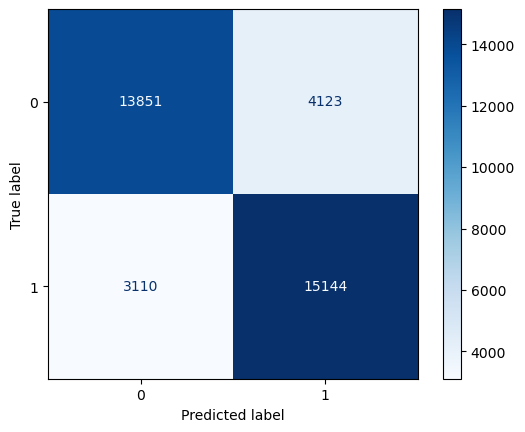

In [35]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, scaled_test_data, y_test,cmap=plt.cm.Blues)  
plt.show()

#### Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

In [49]:
all_data['TARGET_D'].unique()

array([  0.  ,   4.  ,   7.  ,   5.  ,  13.  ,  10.  ,  25.  ,   8.  ,
        20.  ,  16.  ,  26.  ,  15.  ,   3.  ,  60.  ,  23.  ,   6.  ,
        11.  ,  18.  ,  16.87,   2.5 ,  50.  ,  10.7 ,  35.  ,  14.  ,
        21.  ,  17.  , 100.  ,   2.  ,  12.  ,  19.  ,  40.  ,  38.  ,
        45.  ,  30.  ,  12.5 ,   7.5 ,   1.  ,   9.  ,  36.  ,  22.  ,
        24.  ,  41.  ,  51.  ,  28.  ,  32.  ,  43.  ,  31.  ,  33.  ,
        75.  ,  47.  ,  27.  ,  37.  ,  42.  ,  18.25,  34.  ,  13.92,
        29.  , 200.  ,  46.  ,  44.  ,  53.  ,   5.25,  95.  ,  17.5 ,
        48.  , 101.  , 150.  ,   4.5 ,  55.  , 102.  ,  44.21])

In [55]:

mean_target_D = round(all_data.loc[all_data['TARGET_D'] != 0, 'TARGET_D'].mean(),3)
mean_target_D

15.624

In [56]:
3110*15.624

48590.64

#### the model predicts that 4123 people donate BUT they actually do not donate. 
#### then the model predicts that 3110 people do not donate BUT they actually donate.

#### so the accuracy of the model : 80%
    
#### overall when we calculate the avg target donation : 15.624
    
#### we falsely predict that people dont donate and lose donations of the amount :  3110*15.624 = 48590.64

#### thus, we must improve our model using better techniques for model selection. I would do a model pipeline and see whgich model yields the best results and choose best model with the highest accuracy.